<a href="https://colab.research.google.com/github/CynthiaMaina/Implemntation/blob/main/Task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [3]:
# @title Setup
from google.cloud import bigquery
from google.colab import data_table
import bigframes.pandas as bpd

project = 'sql-tutorial-416914'
location = 'US'
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()

In [4]:
job = client.get_job('bquxjob_30bbccb7_18f4f944eac')
print(job.query)

SELECT EXTRACT(YEAR FROM date) AS year,
       COUNT(*) AS total_arrests
FROM `bigquery-public-data.chicago_crime.crime`
WHERE arrest = TRUE
GROUP BY year
ORDER BY total_arrests DESC
;



In [9]:
job = client.get_job('bquxjob_30bbccb7_18f4f944eac')
destination = job.destination



In [10]:
df = client.query(job.query).to_dataframe()

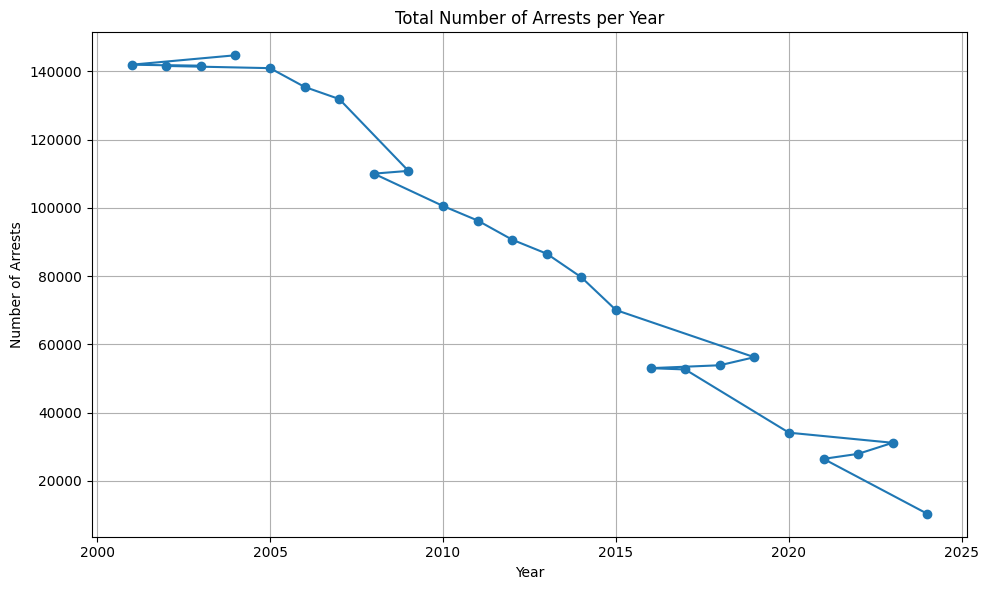

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from google.cloud import bigquery


# Plotting the trend for total number of arrests per year
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['total_arrests'], marker='o', linestyle='-')
plt.title('Total Number of Arrests per Year')
plt.xlabel('Year')
plt.ylabel('Number of Arrests')
plt.grid(True)
#plt.xticks(df['year'], rotation=45)
plt.tight_layout()
plt.show()